# Partial Derivatives, Advanced Plotting and Contour Plots

## Preliminary Mathematics

$$
f(x,y) := \text{ A map, from $\mathbb{R}^{2} \rightarrow \mathbb{R}$ } 
$$

i.e. If you the function $f$ two numbers in your domain ($\mathbb{R}^{2}$) it will map it to a single value (in $\mathbb{R}$).

This can be represented with a 3D graph, where each point in the $xy$-plane is associated with a point along the $z$-axis.

e.g.

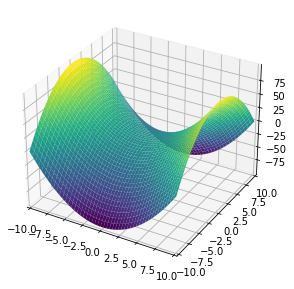

In [49]:
# Access necessary functions.
import sympy as sp 
from sympy import init_printing
init_printing()

# Create variables
x = sp.Symbol('x')
y = sp.Symbol('y')

# Create plot
sp.plotting.plot3d(x**2 - y**2)

# Question 1:

(a) Read the code below. What is an attempting to do?

(b) Run the code below. It will produce an error. Interpret it and fix the code so that a plot is produced.

# Answer 1:

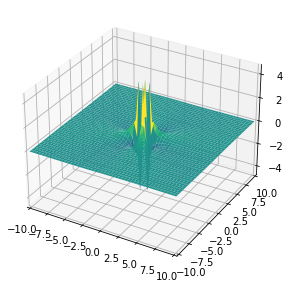

In [50]:
import sympy as sp
from sympy.plotting import plot3d

x = sp.Symbol('x')
y = sp.Symbol('y')
f = (x**2 - y**2)/(x**2 + y**2)

plot3d(sp.diff(f, x, y))

# Plotting Multivariable Functions

## Symbolic Plotting

The function used for symbolic plotting with `sympy` is `plot3d` but it is nested within the sub-module `sympy.plotting`. 

You can import it as such:

In [51]:
from sympy.plotting import plot3d

The algorithm for producing the plot is as follows:

1. Import the plotting function.
2. Specify the symbols in the function (the variables $x$ and $y$, most likely.
3. Create function with variables.
4. Call plot with the argument being the function.

e.g.

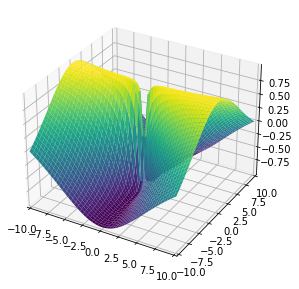

In [52]:
# Access necessary functions.
import sympy as sp
from sympy.plotting import plot3d as plot3d

# Create variables
x = sp.Symbol('x')
y = sp.Symbol('y')

# Create function
func = (x**2 - y**2)/(x**2 + y**2)

# Create plot
plot3d(func)

# Question 2:

(a) Create symbolic plots of the following:

> (i) $$f(x,y) = \frac{\left(x^{2}+y^{2}\right)}{\left(x^{2}-y^{2}\right)}$$
> 
> (ii) $$f(x,y) = y^{3}+x^{3}$$
> 
> (iii) $$f(x,y) = xy(y^{2}-x^{2})$$

(b) Symbolically calculate all the partial derivatives of these functions.



<string>:1: RuntimeWarning: divide by zero encountered in true_divide


ZeroDivisionError: float division by zero

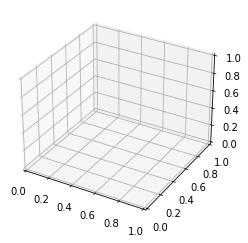

In [53]:
# (a)
# (i)
func_i = (x**2 + y**2)/(x**2 - y**2)
plot3d(func_i)

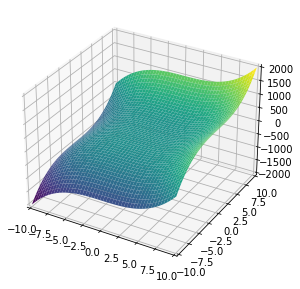

In [54]:
# (ii)
func_ii = (x**3 + y**3)
plot3d(func_ii)

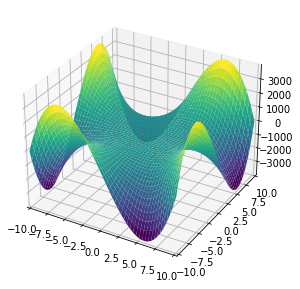

In [55]:
# (ii)
func_iii = (x*y) * (y**2 - x**2)
plot3d(func_iii)

In [65]:
# (b)
for f in [func_i, func_ii, func_iii]:
    print(f)
    print(f"f_x: {sp.diff(f, x)}")
    print(f"f_y: {sp.diff(f, y)}")

(x**2 + y**2)/(x**2 - y**2)
f_x: 2*x/(x**2 - y**2) - 2*x*(x**2 + y**2)/(x**2 - y**2)**2
f_y: 2*y/(x**2 - y**2) + 2*y*(x**2 + y**2)/(x**2 - y**2)**2
x**3 + y**3
f_x: 3*x**2
f_y: 3*y**2
x*y*(-x**2 + y**2)
f_x: -2*x**2*y + y*(-x**2 + y**2)
f_y: 2*x*y**2 + x*(-x**2 + y**2)


## Numeric Plotting

Producing a plot with points is a little more involved when the dimensions of the domain increases.

Before, we simply had to make an array of `x` and then run it through a function, then plot it. Now, we have to develop a grid of points. This may not be completely obvious.

But it is best explained graphically.

![](dots_domain.png)

The domain is now a grid of points, each point in that grid must be mapped through $f(x,y)$ and for that to happen, all points in the grid must be available to call the function on.



Let's consider:

$$
f(x,y) = \sin\left(\frac{x+y}{2}\right) + 2
$$

For the domain:

$$
x \in  [-5,5] \quad
y \in  [-5,5]
$$

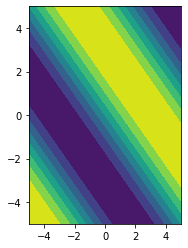

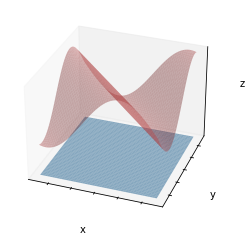

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1)
x = np.linspace(-5,5)
y = np.linspace(-5,5)

# Create our grid of points
xv, yv = np.meshgrid(x,y)
ax = plt.subplot(1,2,1)

# Make a contour plot that is filled with color.
ax.contourf(xv,yv, np.sin(0.5*xv+0.5*yv) + 2)


# Make a second figure and make it 3D
fig = plt.figure(2)
ax = fig.gca(projection='3d')

# Make a zero vector to plot the domain of the function
zv, zvv = np.meshgrid(np.zeros(50), np.zeros(50))

# Plot the domain
ax.plot_surface(xv,yv,zv, alpha = 0.5)

# Make and plot our actual function listed above
f = np.sin(0.5*xv+0.5*yv) + 2
ax.plot_surface(xv,yv,f, color="#CC4444", alpha=0.4)

# Change viewing angle
ax.view_init(30,110)

# Label our axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Make it pretty
ax.grid(False)
# Turn off numbers on axes
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticks([])



# Question 3:

What is the purpose of `alpha`?

# Answer 3:

It sets the transparency level of the sine function (in red).

## So what are the steps for 3D plotting?

### 1. Make your x-domain.

In [71]:
import numpy as np
a = 2; b = 4
x = np.linspace(a,b)
display(x)

array([2.        , 2.04081633, 2.08163265, 2.12244898, 2.16326531,
       2.20408163, 2.24489796, 2.28571429, 2.32653061, 2.36734694,
       2.40816327, 2.44897959, 2.48979592, 2.53061224, 2.57142857,
       2.6122449 , 2.65306122, 2.69387755, 2.73469388, 2.7755102 ,
       2.81632653, 2.85714286, 2.89795918, 2.93877551, 2.97959184,
       3.02040816, 3.06122449, 3.10204082, 3.14285714, 3.18367347,
       3.2244898 , 3.26530612, 3.30612245, 3.34693878, 3.3877551 ,
       3.42857143, 3.46938776, 3.51020408, 3.55102041, 3.59183673,
       3.63265306, 3.67346939, 3.71428571, 3.75510204, 3.79591837,
       3.83673469, 3.87755102, 3.91836735, 3.95918367, 4.        ])

### 2. Make your y-domain.

In [72]:
c = 9; d = 11
y = np.linspace(c,d)
display(y)

array([ 9.        ,  9.04081633,  9.08163265,  9.12244898,  9.16326531,
        9.20408163,  9.24489796,  9.28571429,  9.32653061,  9.36734694,
        9.40816327,  9.44897959,  9.48979592,  9.53061224,  9.57142857,
        9.6122449 ,  9.65306122,  9.69387755,  9.73469388,  9.7755102 ,
        9.81632653,  9.85714286,  9.89795918,  9.93877551,  9.97959184,
       10.02040816, 10.06122449, 10.10204082, 10.14285714, 10.18367347,
       10.2244898 , 10.26530612, 10.30612245, 10.34693878, 10.3877551 ,
       10.42857143, 10.46938776, 10.51020408, 10.55102041, 10.59183673,
       10.63265306, 10.67346939, 10.71428571, 10.75510204, 10.79591837,
       10.83673469, 10.87755102, 10.91836735, 10.95918367, 11.        ])

### 3. Create 2D versions of x and y with `np.meshgrid()`

In [73]:
xv, yv = np.meshgrid(x,y)
display(xv)
display(yv)

array([[2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ],
       [2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ],
       [2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ],
       ...,
       [2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ],
       [2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ],
       [2.        , 2.04081633, 2.08163265, ..., 3.91836735, 3.95918367,
        4.        ]])

array([[ 9.        ,  9.        ,  9.        , ...,  9.        ,
         9.        ,  9.        ],
       [ 9.04081633,  9.04081633,  9.04081633, ...,  9.04081633,
         9.04081633,  9.04081633],
       [ 9.08163265,  9.08163265,  9.08163265, ...,  9.08163265,
         9.08163265,  9.08163265],
       ...,
       [10.91836735, 10.91836735, 10.91836735, ..., 10.91836735,
        10.91836735, 10.91836735],
       [10.95918367, 10.95918367, 10.95918367, ..., 10.95918367,
        10.95918367, 10.95918367],
       [11.        , 11.        , 11.        , ..., 11.        ,
        11.        , 11.        ]])

### 4. Create your function using your newly made `xv` and `yv` variables

Let's do a fun one!

$$
f(x,y) =\frac{1}{x-3} + \frac{1}{y-10}
$$



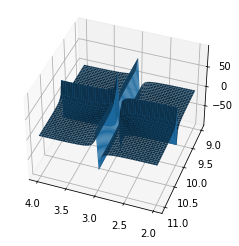

In [74]:
import matplotlib.pyplot as plt

# Make the function 
zv = 1/(xv - 3) + 1/(yv - 10)

# Make a 3D figure
fig = plt.figure()
ax = fig.gca(projection="3d")

# Plot the surface and change the viewing angle.
ax.plot_surface(xv,yv,zv)
ax.view_init(40,110) # Change the angle of viewing.

# Question 4:

For the domains:

$$
x \in  [-10,10] \quad
y \in  [-10,10]
$$

### Functions:

> (i) $xy$
> 
> (ii) $-xy$
> 
> (iii) $x^2 + y^2 + z^2 = 0$
> 
> (iv) $3\sin(\frac{x + y}{5}) + 6$
> 
> (v) $\cos(x) + \sin(y)$

(a) Calculate all partial derivatives of all functions.

(b) Produce individual plots using `matplotlib` for the following equations and superimpose its derivatives on the same plots.

# Answer 4:

In [104]:
a = -10; b = 10
x = np.linspace(a,b)
y = np.linspace(a,b)

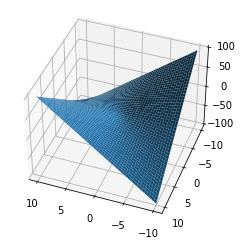

In [112]:
# (a)

xv, yv = np.meshgrid(x,y)

zv = xv * yv
zv_diff = np.diff(zv)

# Make a 3D figure
fig = plt.figure()
ax = fig.gca(projection="3d")

# Plot the surface and change the viewing angle.
ax.plot_surface(xv,yv,zv)

ax.view_init(40,110) # Change the angle of viewing.

# Demonstrating that $f_{xy} = f_{yx}$

One of the key things to understand about partial derivatives is that it does not affect your result if you differentiate in a different sequence. This theorem has a few names, but one of the most common is **Schwarz' Theorem**.

$$
\frac{\partial^{2} f}{\partial y \ \partial x} =
\frac{\partial^{2} f}{\partial x \ \partial y} 
$$

We can demonstrate this with `sympy`.

# Question 5:

Using the code below, demonstrate that the function $f$ has equivalent mixed derivatives.

Requirements:
1. You should evaluate both cases and save them into separate variables.
2. Write an if-statement that compares them and prints `"They're the same!"` if true.

# Answer 5:

In [79]:
import sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
f = sp.Function('f')(x,y)

# Your code here
f_xy = sp.diff(f, x, y)
f_yx = sp.diff(f, y, x)

if f_xy == f_yx:
    print("They're the same!")
else:
    print("They're NOT the same. User error, most likely.")

They're the same!


# Contour Plotting

# Question 6:

With our `matplotlib` plotting of the function 

$$
f(x,y) = \sin\left(\frac{x+y}{2}\right) + 2
$$

we produced a `contour` plot (above). Take this example and modify it to produce contour plots of the following functions:

(a) $x^2 + 4y^2$

(b) $(x-1)^2 + y^2$

# Answer 6:

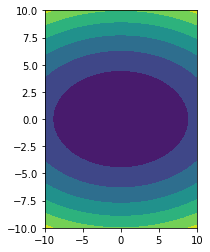

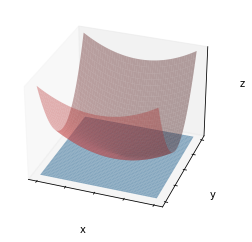

In [92]:
# (a)
fig = plt.figure(1)
x = np.linspace(-10,10)
y = np.linspace(-10,10)

# Create our grid of points
xv, yv = np.meshgrid(x,y)
ax = plt.subplot(1,2,1)

# Make a contour plot that is filled with color.
ax.contourf(xv,yv, xv**2 + 4*(yv**2))


# Make a second figure and make it 3D
fig = plt.figure(2)
ax = fig.gca(projection='3d')

# Make a zero vector to plot the domain of the function
zv, zvv = np.meshgrid(np.zeros(50), np.zeros(50))

# Plot the domain
ax.plot_surface(xv,yv,zv, alpha = 0.5)

# Make and plot our actual function listed above
f = xv**2 + 4*(yv**2)
ax.plot_surface(xv,yv,f, color="#CC4444", alpha=0.4)

# Change viewing angle
ax.view_init(30,110)

# Label our axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Make it pretty
ax.grid(False)
# Turn off numbers on axes
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticks([])


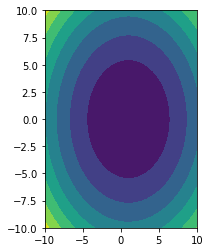

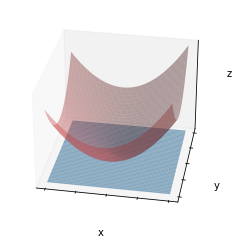

In [94]:
# (b)

fig = plt.figure(1)
x = np.linspace(-10,10)
y = np.linspace(-10,10)

# Create our grid of points
xv, yv = np.meshgrid(x,y)
ax = plt.subplot(1,2,1)

# Make a contour plot that is filled with color.
g = (xv - 1)**2 + (yv**2)
ax.contourf(xv,yv, g)


# Make a second figure and make it 3D
fig = plt.figure(2)
ax = fig.gca(projection='3d')

# Make a zero vector to plot the domain of the function
zv, zvv = np.meshgrid(np.zeros(50), np.zeros(50))

# Plot the domain
ax.plot_surface(xv,yv,zv, alpha = 0.5)

# Make and plot our actual function listed above
f = (xv - 1)**2 + (yv**2)
ax.plot_surface(xv,yv,f, color="#CC4444", alpha=0.4)

# Change viewing angle
ax.view_init(30,100)

# Label our axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Make it pretty
ax.grid(False)
# Turn off numbers on axes
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticks([])